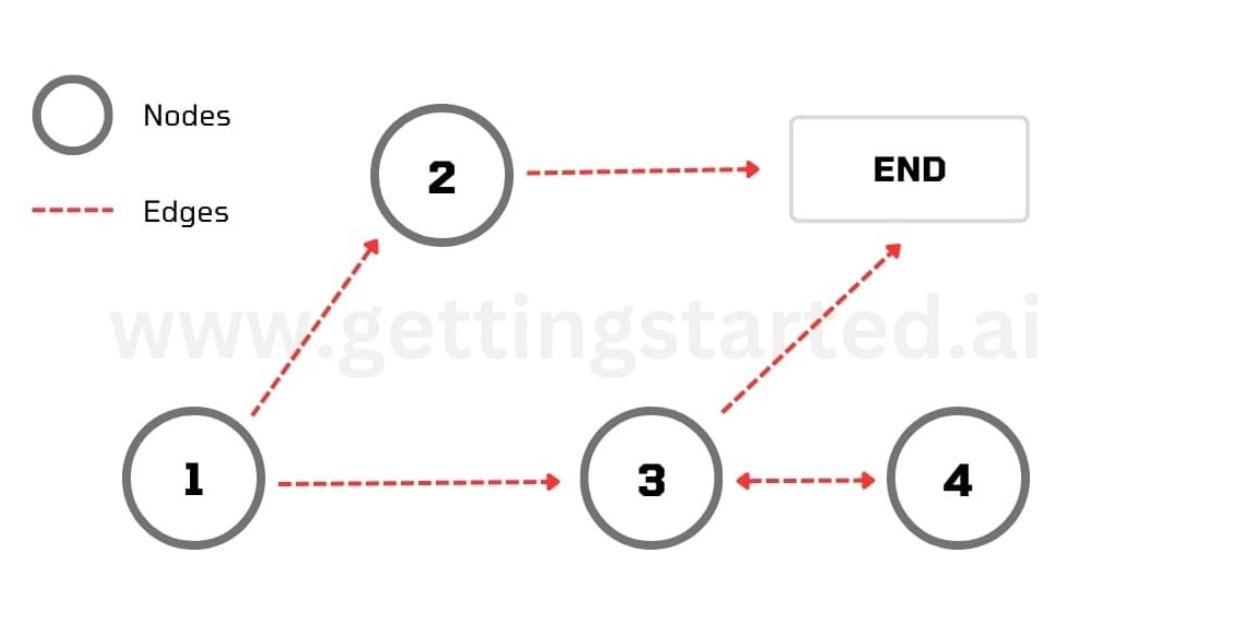

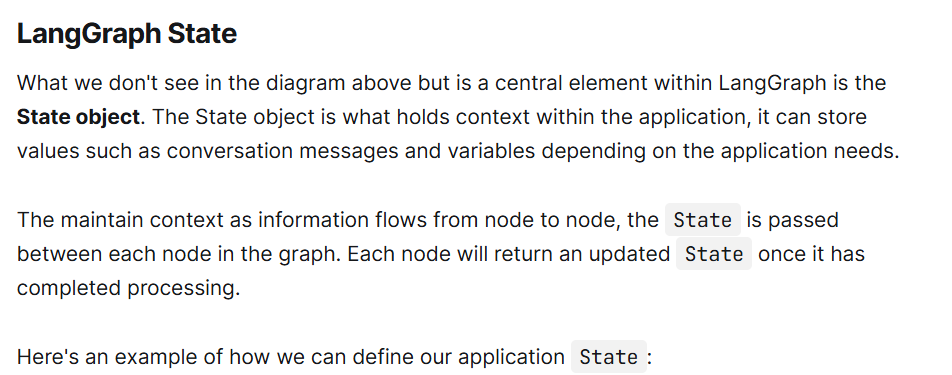


In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from pydantic import BaseModel, Field, computed_field
from typing import TypedDict, Annotated


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

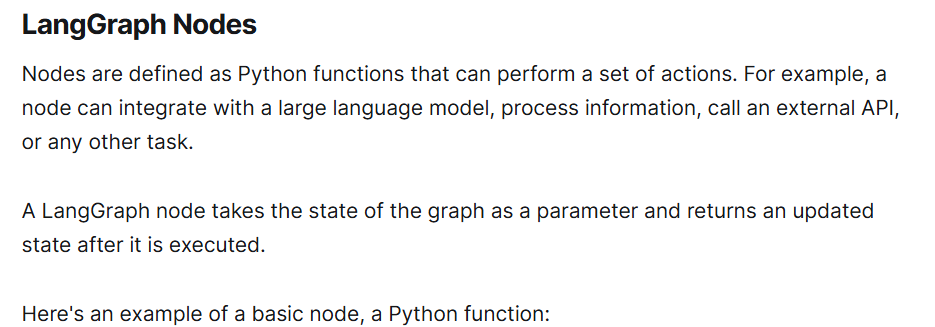

In [ ]:
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(model_name="gpt-4o")

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

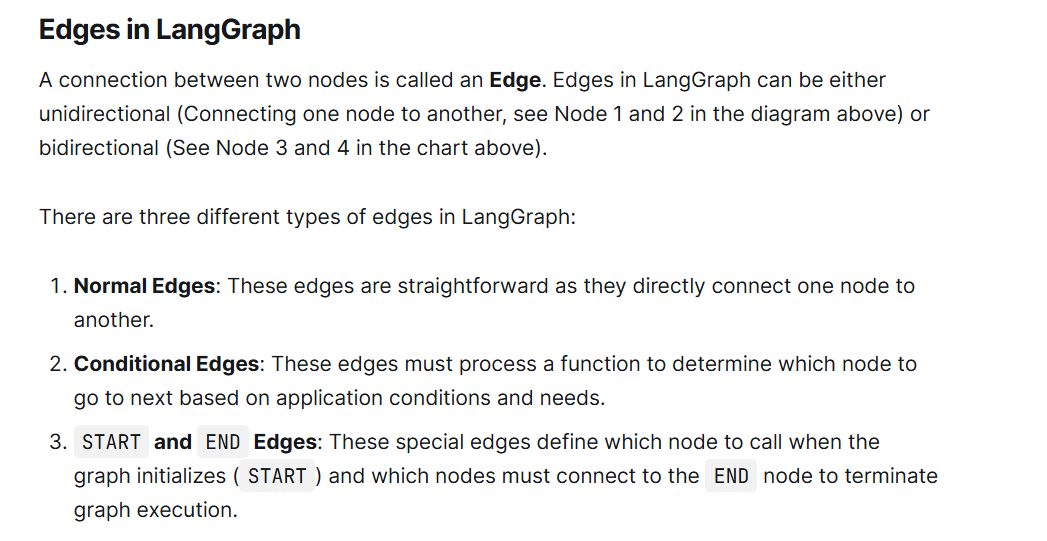

In [ ]:
from typing import Optional, Literal
from langchain_core.tools import tool

from modules.job import Job
from modules.resume import Resume

def process_job() -> Job:
    """Process job data."""
    job = Job.mock()
    return job

def process_resume() -> Resume:
    """Process resume data."""
    resume = Resume.mock()
    return resume

@tool
def get_job(field: Optional[Literal['title', 'company', 'location', 'salary', 'description', 'responsibilities', 'benefits', 'employment_type', 'posted_date']] = None) -> str:
    """Get job data."""
    job = process_job()
    if field:
        return getattr(job, field)
    return job.dict()

@tool
def get_resume(field: Optional[Literal['name', 'professional_summary', 'work_experience', 'education', 'skills']] = None) -> str:
    """Get resume data."""
    resume = process_resume()
    if field:
        return getattr(resume, field)
    return resume.dict()